In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from datasets import load_dataset

In [2]:
data = load_dataset("liar", trust_remote_code=True)
data

DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 10269
    })
    test: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 1283
    })
    validation: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 1284
    })
})

In [3]:
data['train'].features

# 'false' (0), 'half-true' (1), 'mostly-true' (2), 'true' (3), 'barely-true' (4), 'pants-fire' (5)

# real-world order      : pants-fire, false, barely-true, half-true, mostly-true, and true
# dataset-assigned order: 5, 0, 4, 1, 2, 3

{'id': Value(dtype='string', id=None),
 'label': ClassLabel(names=['false', 'half-true', 'mostly-true', 'true', 'barely-true', 'pants-fire'], id=None),
 'statement': Value(dtype='string', id=None),
 'subject': Value(dtype='string', id=None),
 'speaker': Value(dtype='string', id=None),
 'job_title': Value(dtype='string', id=None),
 'state_info': Value(dtype='string', id=None),
 'party_affiliation': Value(dtype='string', id=None),
 'barely_true_counts': Value(dtype='float32', id=None),
 'false_counts': Value(dtype='float32', id=None),
 'half_true_counts': Value(dtype='float32', id=None),
 'mostly_true_counts': Value(dtype='float32', id=None),
 'pants_on_fire_counts': Value(dtype='float32', id=None),
 'context': Value(dtype='string', id=None)}

In [4]:
# pandas, to dataframe for simpler eda process
df_train = data['train'].to_pandas()
df_test = data['test'].to_pandas()
df_validation = data['validation'].to_pandas()

df_types = {
    'df_train': df_train,
    'df_test': df_test,
    'df_validation': df_validation
}

In [5]:
# quick view of all three datasets
for name, df in df_types.items():
    print(f'\n\n{name}:')
    display(df.head(3))



df_train:


,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,2,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver




df_test:


,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,11972.json,3,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30.0,30.0,42.0,23.0,18.0,Radio interview
1,11685.json,0,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2.0,1.0,0.0,0.0,0.0,a news conference
2,11096.json,0,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63.0,114.0,51.0,37.0,61.0,comments on ABC's This Week.




df_validation:


,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,12134.json,4,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1.0,0.0,1.0,0.0,0.0,an interview with ABC17 News
1,238.json,5,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,,,none,11.0,43.0,8.0,5.0,105.0,
2,7891.json,0,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0.0,1.0,1.0,1.0,0.0,a U.S. Ways and Means hearing


In [6]:
df_train.iloc[0].statement

'Says the Annies List political group supports third-trimester abortions on demand.'

In [7]:
# size check
for name, df in df_types.items():    
    print(f'{name}: {len(df)}')

df_train: 10269
df_test: 1283
df_validation: 1284


In [8]:
# nan/na/null and empty string check
for name, df in df_types.items():
    print(f"{name} -- NA/null values exist? {df.isna().any().any()} | Empty strings exist? {(df == '').any().any()}")

df_train -- NA/null values exist? False | Empty strings exist? True
df_test -- NA/null values exist? False | Empty strings exist? True
df_validation -- NA/null values exist? False | Empty strings exist? True


In [9]:
df_validation.iloc[1].state_info

''

In [10]:
# columns with empty strings
for name, df in df_types.items():    
    empty_cols = df.columns[(df == '').any()]
    if not empty_cols.empty:
        print(f"\nin {name}") 
        for col in empty_cols:
            print(f"- {col}")


in df_train
- job_title
- state_info
- context

in df_test
- job_title
- state_info
- context

in df_validation
- job_title
- state_info
- context


In [11]:
# label proportion check

# reminder
# real-world order      : pants-fire, false, barely-true, half-true, mostly-true, and true
# dataset-assigned order: 5, 0, 4, 1, 2, 3
corr_label = {
    0: 'false',
    1: 'half-true',
    2: 'mostly-true',
    3: 'true',
    4: 'barely-true',
    5: 'pants-fire',
}

for name, df in df_types.items():
    print(f'for {name}')
    counts = df.label.value_counts()#.sort_index()
    for label_num, label_ct in counts.items():
        corr_label_name = corr_label[label_num]
        corr_percentage = "{:.2%}".format(label_ct / len(df))
        print(f'- {corr_label_name}: {label_ct} ({corr_percentage})')
    print()

for df_train
- half-true: 2123 (20.67%)
- false: 1998 (19.46%)
- mostly-true: 1966 (19.14%)
- true: 1683 (16.39%)
- barely-true: 1657 (16.14%)
- pants-fire: 842 (8.20%)

for df_test
- half-true: 267 (20.81%)
- false: 250 (19.49%)
- mostly-true: 249 (19.41%)
- barely-true: 214 (16.68%)
- true: 211 (16.45%)
- pants-fire: 92 (7.17%)

for df_validation
- false: 263 (20.48%)
- mostly-true: 251 (19.55%)
- half-true: 248 (19.31%)
- barely-true: 237 (18.46%)
- true: 169 (13.16%)
- pants-fire: 116 (9.03%)



In [12]:
pd.set_option('display.max_colwidth', None)

In [13]:
# statement properties (using test)
df_train.statement.str.len().describe() # chars

count    10269.000000
mean       106.323693
std         45.101317
min         11.000000
25%         73.000000
50%         99.000000
75%        133.000000
max        395.000000
Name: statement, dtype: float64

In [14]:
# least character statements
min_length = df_train.statement.str.len().min()
min_statement = df_train.loc[df_train.statement.str.len() == min_length, 'statement']
print(min_statement)

709     On abortion
1014    On abortion
1071    On torture.
6780    On torture.
Name: statement, dtype: object


In [15]:
# most-character statement
max_length = df_train.statement.str.len().max()
max_statement = df_train.loc[df_train.statement.str.len() == max_length, 'statement']
print(max_statement)

9991    Barbara Buono by the numbers: As a Trenton politician, she voted to raise taxes 154 times. Under her, property taxes up 70 percent. Backed a 16 percent sales tax increase. Utilities, nursing homes, cell phones, parking lots, lottery wins, gyms She taxed them all. Architect of Corzines budget, she drove New Jersey $2 billion into debt. Barbara Buono by the numbers: taking New Jersey backwards.
Name: statement, dtype: object


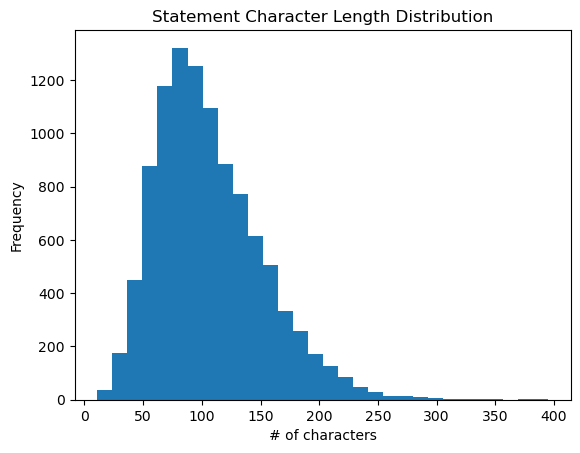

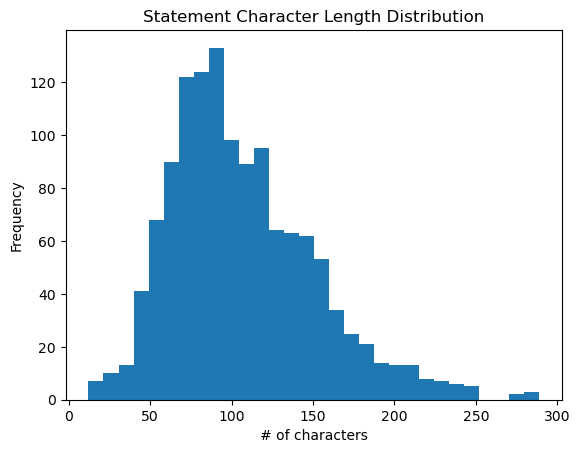

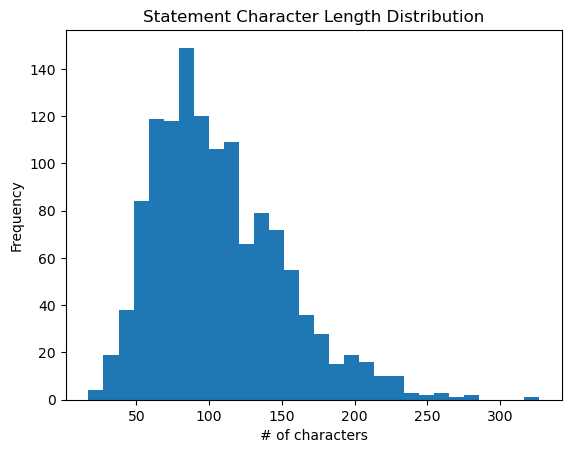

In [16]:
# histograms of character length distribution
df_train['char_len'] = df_train.statement.str.len()
plt.hist(x=df_train['char_len'], bins=30)
plt.title('Statement Character Length Distribution')
plt.xlabel('# of characters')
plt.ylabel('Frequency')
plt.show()

df_test['char_len'] = df_test.statement.str.len()
plt.hist(x=df_test['char_len'], bins=30)
plt.title('Statement Character Length Distribution')
plt.xlabel('# of characters')
plt.ylabel('Frequency')
plt.show()

df_validation['char_len'] = df_validation.statement.str.len()
plt.hist(x=df_validation['char_len'], bins=30)
plt.title('Statement Character Length Distribution')
plt.xlabel('# of characters')
plt.ylabel('Frequency')
plt.show()

# very similar distributions

In [17]:
# speaker properties (relevant leakage feature)
frequent_speakers = df_train.speaker.value_counts().head(10)
frequent_speakers

speaker
barack-obama       493
donald-trump       274
hillary-clinton    239
mitt-romney        180
scott-walker       150
john-mccain        148
chain-email        142
rick-perry         142
marco-rubio        117
rick-scott         115
Name: count, dtype: int64

In [18]:
# true/false count frequency among most frequent speakers
tf_labels = ['barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts']

filtered_speakers = df_train[df_train['speaker'].isin(frequent_speakers.index.tolist())] # can't directly use in index form
speaker_labels = filtered_speakers[['speaker'] + tf_labels]

frequent_speakers_rows = speaker_labels.drop_duplicates(subset='speaker', keep='first')
frequent_speakers_rows = frequent_speakers_rows.set_index('speaker').loc[frequent_speakers.index.tolist()].reset_index()

frequent_speakers_rows['most_frequent_count_type'] = frequent_speakers_rows[tf_labels].idxmax(axis=1)

frequent_speakers_rows

,speaker,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,most_frequent_count_type
0,barack-obama,70.0,71.0,160.0,163.0,9.0,mostly_true_counts
1,donald-trump,63.0,114.0,51.0,37.0,61.0,false_counts
2,hillary-clinton,40.0,29.0,69.0,76.0,7.0,mostly_true_counts
3,mitt-romney,34.0,32.0,58.0,33.0,19.0,half_true_counts
4,scott-walker,26.0,41.0,32.0,40.0,11.0,false_counts
5,john-mccain,31.0,39.0,31.0,37.0,8.0,false_counts
6,chain-email,11.0,43.0,8.0,5.0,105.0,pants_on_fire_counts
7,rick-perry,30.0,30.0,42.0,23.0,18.0,half_true_counts
8,marco-rubio,33.0,24.0,32.0,35.0,5.0,mostly_true_counts
9,rick-scott,28.0,23.0,38.0,34.0,7.0,half_true_counts
